## Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('contain_nana.csv')
df.shape

(15000, 12)

### Data Cleaning

In [3]:
df.drop_duplicates(inplace=True)
df.shape

(15000, 12)

In [4]:
df.columns

Index(['date', 'username', 'to', 'replies', 'retweets', 'favorites', 'text',
       'geo', 'mentions', 'hashtags', 'id', 'permalink'],
      dtype='object')

In [5]:
df.nunique()

date         14858
username      6005
to            2135
replies         61
retweets       124
favorites      355
text         13932
geo              0
mentions       685
hashtags      1790
id           15000
permalink    15000
dtype: int64

In [6]:
df.isnull().sum()

date             0
username         0
to            9003
replies          0
retweets         0
favorites        0
text             0
geo          15000
mentions     13462
hashtags     10442
id               0
permalink        0
dtype: int64

In [7]:
#dropping columns that have null values and those that will not be used in the analysis
df.drop(['to','geo','mentions','id','permalink'], axis = 1, inplace = True )
df.head()

,date,username,replies,retweets,favorites,text,hashtags
0,2020-09-06 23:37:55,BMaashaallah,0,0,1,Astroturf started and completed by the visiona...,#4More4Nana #Wepraypic
1,2020-09-06 23:26:45,BraCudjoe1,1,0,3,Nana Akufo Addo refused to vote for my crush t...,NaN
2,2020-09-06 23:20:27,SethAmpem,0,0,2,"H.E. Nana Addo Dankwa Akufo-Addo, The Presiden...",NaN
3,2020-09-06 23:19:16,CPAG2020,0,0,0,SO WHO HAS AN IMPERVIOUS SKIN: NANA ADDO OR JO...,NaN
4,2020-09-06 23:10:10,romeoparkah27,0,0,0,Quick reminder..Nana Addo the president of the...,NaN


## Getting Sentiments Using textblob

#### Steps
1. Clean Data: This is to remove symbols and non alphabets that may be present in the tweet but does give meaning to it.
2. Tokenize the data
3. Normalizing data is done to ensure that different forms of a particular word are represented as one. For instannce **ran**,**run** and **running** are different variation of the word. Normalisation helps represent all these forms by a single form **run**. There are two main form of Normalizing data. These are
Stemming: removing affixes from words and representing it with its root word
Lemmatization: normalizes a word with the context of vocabulary and morphological analysis of words in text
4. Get sentiment

### Nana Addo

In [8]:
import re
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob

In [10]:
def clean_tweet(tweet):
    review = re.sub('[^a-zA-Z]', ' ', tweet) #replaces symbols, numbers with space
    review = review.lower()
    #review = review.split()
    cleaned_tokens = []
    for word, tag in pos_tag(word_tokenize(review)):
        stop_words = stopwords.words('english')
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatizer = WordNetLemmatizer()
        word = lemmatizer.lemmatize(word, pos)
        
        if len(word) > 0 and word not in string.punctuation and word.lower() not in stop_words:
            cleaned_tokens.append(word.lower())
    return ' '.join(cleaned_tokens)

def get_tweet_sentiment(tweet): 
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet(tweet)) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'
def main():
    global sampled_tweets
    sampled_tweets = []
    for index,row in df[['text']].iterrows():
        parsed_tweet = {}
        parsed_tweet['text'] = row['text']
        parsed_tweet['sentiment'] = get_tweet_sentiment(row['text'])
        sampled_tweets.append(parsed_tweet)
    global ptweets, ntweets, neutral_tweets

    ptweets = [tweet for tweet in sampled_tweets if tweet['sentiment'] == 'positive']
    ntweets = [tweet for tweet in sampled_tweets if tweet['sentiment'] == 'negative']
    neutral_tweets = [tweet for tweet in sampled_tweets if tweet['sentiment'] == 'neutral']

    print(f'Total Positive Tweets: {len(ptweets)}')
    print(f'Total Negative Tweets: {len(ntweets)}') 
    print("Total Neutral tweets: {}".format((len(sampled_tweets) - (len(ntweets)+len(ptweets))))) 

        
         
if __name__ == "__main__": 
    # calling main function 
    main() 

Total Positive Tweets: 5993
Total Negative Tweets: 2492
Total Neutral tweets: 6515


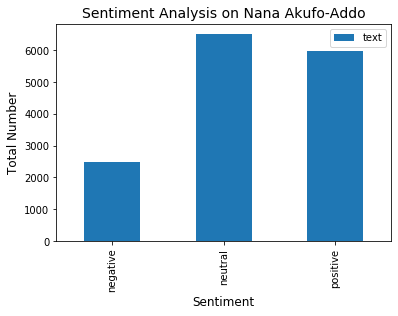

In [16]:
df2 = pd.DataFrame.from_dict(sampled_tweets)
df2.groupby('sentiment').count().plot(kind='bar')

plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Total Number', fontsize=12)
plt.title('Sentiment Analysis on Nana Akufo-Addo', fontsize=14)
plt.show()

### J M

In [17]:
df_jm = pd.read_csv('contains_mahama.csv')
df_jm.shape

(15000, 12)

In [18]:
#dropping columns that have null values and those that will not be used in the analysis
df_jm.drop(['to','geo','mentions','id','permalink'], axis = 1, inplace = True )
df_jm.head()

,date,username,replies,retweets,favorites,text,hashtags
0,2020-09-06 23:20:44,edemagbana,2,6,21,John Mahama speaks ahead of Manifesto Launch. ...,NaN
1,2020-08-20 06:30:06,JLCPCB,18,85,923,"Only $2 for PCB Prototype, 24 Hours Fast Turn ...",NaN
2,2020-09-06 23:19:16,CPAG2020,0,0,0,SO WHO HAS AN IMPERVIOUS SKIN: NANA ADDO OR JO...,NaN
3,2020-09-06 23:04:22,AfoakwaOsikani,8,23,95,"""My message to John Mahama is that you cannot ...",#4More4Nana
4,2020-09-06 21:44:56,globe_paces,0,2,2,"I know how to do it, Akufo-Addo doesn’t, that’...",NaN


In [19]:
def clean_tweet(tweet):
    review = re.sub('[^a-zA-Z]', ' ', tweet) #replaces symbols, numbers with space
    review = review.lower()
    #review = review.split()
    cleaned_tokens = []
    for word, tag in pos_tag(word_tokenize(review)):
        stop_words = stopwords.words('english')
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatizer = WordNetLemmatizer()
        word = lemmatizer.lemmatize(word, pos)
        
        if len(word) > 0 and word not in string.punctuation and word.lower() not in stop_words:
            cleaned_tokens.append(word.lower())
    return ' '.join(cleaned_tokens)

def get_tweet_sentiment(tweet): 
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet(tweet)) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'
def main():
    global sampled_tweets
    sampled_tweets = []
    for index,row in df_jm[['text']].iterrows():
        parsed_tweet = {}
        parsed_tweet['text'] = row['text']
        parsed_tweet['sentiment'] = get_tweet_sentiment(row['text'])
        sampled_tweets.append(parsed_tweet)
    global ptweets, ntweets, neutral_tweets

    ptweets = [tweet for tweet in sampled_tweets if tweet['sentiment'] == 'positive']
    ntweets = [tweet for tweet in sampled_tweets if tweet['sentiment'] == 'negative']
    neutral_tweets = [tweet for tweet in sampled_tweets if tweet['sentiment'] == 'neutral']

    print(f'Total Positive Tweets: {len(ptweets)}')
    print(f'Total Negative Tweets: {len(ntweets)}') 
    print("Total Neutral tweets: {}".format((len(sampled_tweets) - (len(ntweets)+len(ptweets))))) 

        
         
if __name__ == "__main__": 
    # calling main function 
    main() 

Total Positive Tweets: 6223
Total Negative Tweets: 2397
Total Neutral tweets: 6380


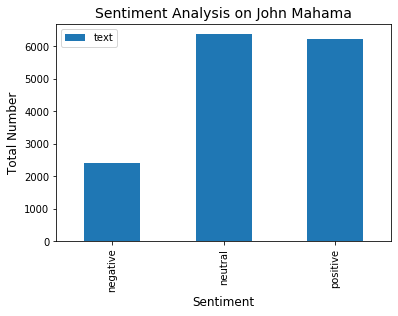

In [20]:
df2 = pd.DataFrame.from_dict(sampled_tweets)
df2.groupby('sentiment').count().plot(kind='bar')

plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Total Number', fontsize=12)
plt.title('Sentiment Analysis on John Mahama', fontsize=14)
plt.show()